# Exploratory Data Analysis (EDA) with Python
This notebook will help us to do EDA with Python.

## Three important steps for EDA
1- Understand the data\
2- Clean the data\
3- Find a relationship between data

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
ship= sns.load_dataset('titanic')
ship.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#save the dataset
ship.to_csv('titanic.csv')

In [5]:
# To view data types of every columns
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#Rename the dataset for ease of use
ks = ship

In [7]:
#view rows and columns 
ks.shape

(891, 15)

In [8]:
#unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [9]:
# column names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
# individual column view
ks['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
# To view unique values for two diff columns
(ks[['age', 'sex']].nunique())

age    88
sex     2
dtype: int64

# Cleaning and filtering the data


In [12]:
# find the missing values
ks.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
ks.shape

(891, 15)

In [15]:
# Dropping missing values (Cleaning data)
ks_clean_data = ks.drop(["deck"], axis=1)
ks_clean_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
ks_clean_data.shape

(891, 14)

In [17]:
#This drop function only works for columns, not rows
# Dropping all missing N/A values
ks_clean_data.dropna().shape

(712, 14)

In [18]:
ks_clean_data = ks_clean_data.dropna()  # Save the cleaned DataFrame
ks_clean_data.shape  # Now it reflects the updated size

(712, 14)

In [19]:
ks_clean_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
ks_clean_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
# View column value counts
ks_clean_data['embark_town'].value_counts()

embark_town
Southampton    554
Cherbourg      130
Queenstown      28
Name: count, dtype: int64

## Checking outliers through plots

<Axes: ylabel='age'>

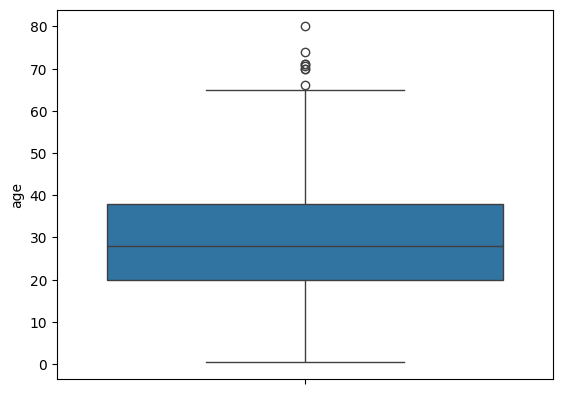

In [22]:
sns.boxplot(y="age", data=ks_clean_data)

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_13276\2860357248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks_clean_data['age']) #this is to be done to check perfectly bell curve of data / dispersion


<Axes: xlabel='age', ylabel='Density'>

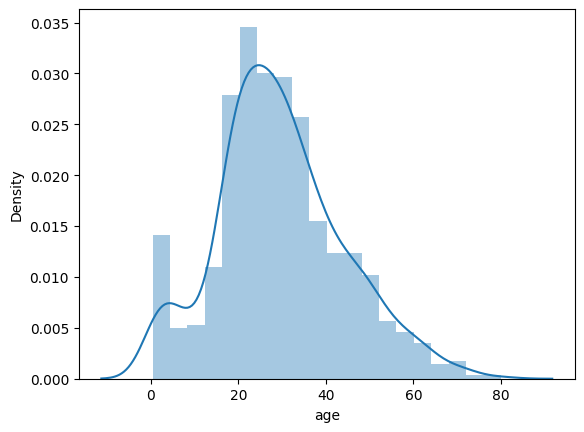

In [23]:
sns.distplot(ks_clean_data['age']) #this is to be done to check perfectly bell curve of data / dispersion

In [30]:
#outliers removal
ks_clean_data["age"].mean()

np.float64(29.21797163120567)

In [ ]:
# To remove/filter values greater than 70
ks_clean_data = ks_clean_data[ks_clean_data["age"] < 70]
ks_clean_data.shape

(705, 14)

In [27]:
ks_clean_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [29]:
ks_clean_data["age"].mean()

np.float64(29.21797163120567)

<Axes: ylabel='age'>

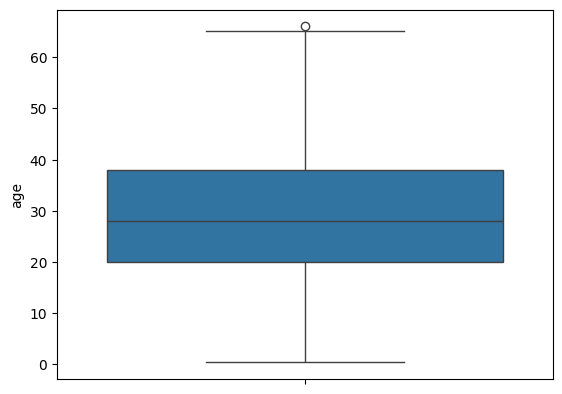

In [ ]:
# To view data after outliers removal 
sns.boxplot(y="age", data=ks_clean_data) #Now we will see the data without outliers

<Axes: >

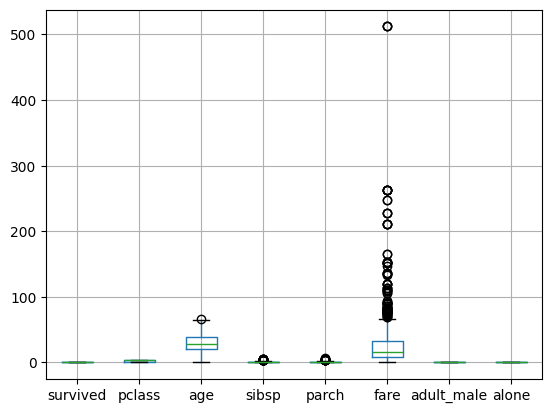

In [32]:
# To check more outliers 
ks_clean_data.boxplot()

<Axes: >

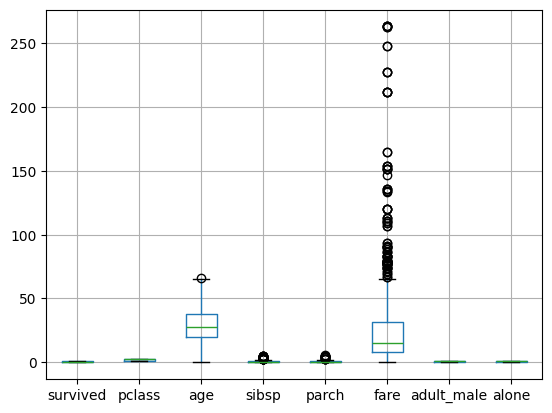

In [34]:
# Check another parameter with outlier
ks_clean_data = ks_clean_data[ks_clean_data["fare"] < 300]
ks_clean_data.boxplot()

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_13276\4115117192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks_clean_data['fare']) #this is to be done to check perfectly bell curve of data / dispersion


<Axes: xlabel='fare', ylabel='Density'>

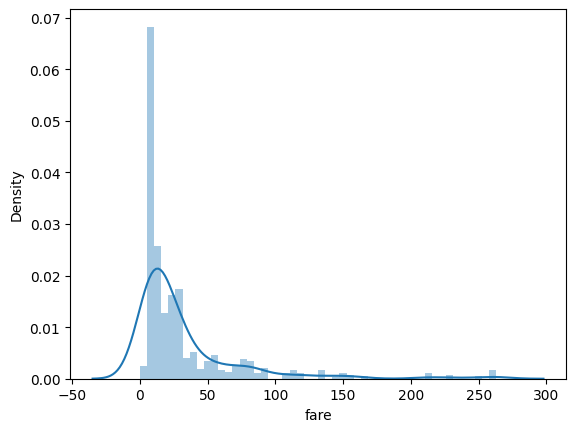

In [35]:
sns.distplot(ks_clean_data['fare']) #this is to be done to check perfectly bell curve of data / dispersion

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

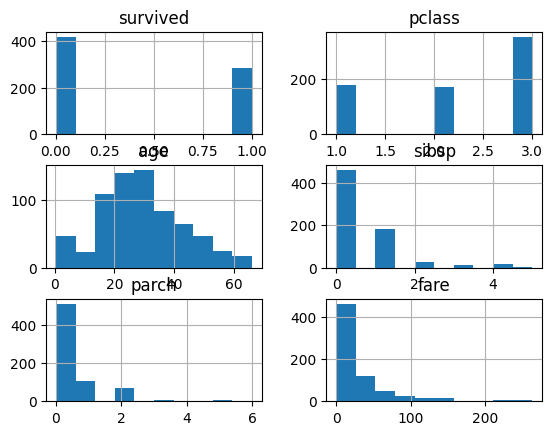

In [36]:
ks_clean_data.hist()

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_13276\1025724327.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(ks_clean_data['class']).plot.bar()


<Axes: xlabel='class'>

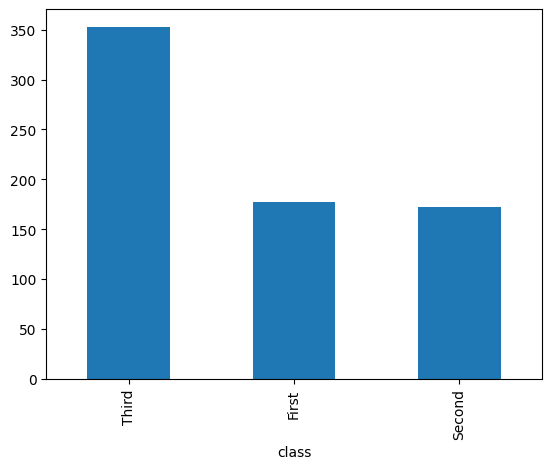

In [37]:
pd.value_counts(ks_clean_data['class']).plot.bar()

In [ ]:
ks_clean_data.groupby(["sex", "class"]).mean(numeric_only=True)
# Numeric only mean for the columns

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_13276\3333156635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ks_clean_data.groupby(["sex", "class"]).mean(numeric_only=True)


survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.389474     1.0  40.067579  0.389474  0.336842   62.901096   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.968421  0.526316  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

In [43]:
# Compare this with previous dataset (unclean data vs clean data)
ks.groupby(["sex", "class"]).mean(numeric_only=True)

C:\Users\Yawar Ali\AppData\Local\Temp\ipykernel_13276\4218643002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ks.groupby(["sex", "class"]).mean(numeric_only=True)


survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

# Relationship

In [46]:
corr_ks_clean = ks_clean_data.corr(numeric_only=True)

<Axes: >

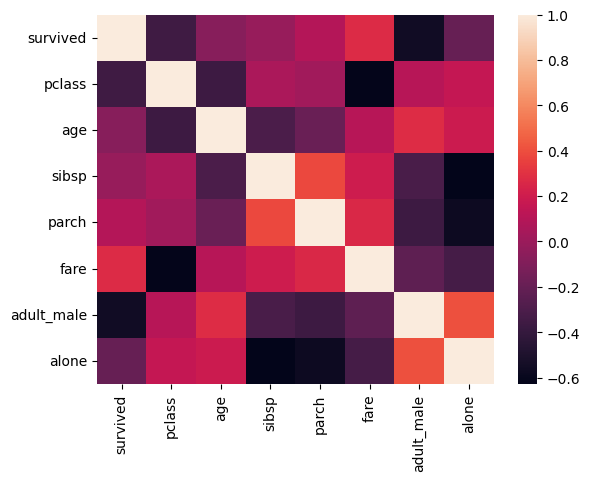

In [ ]:
# Checking correlations with different variables
sns.heatmap(corr_ks_clean)

<Axes: >

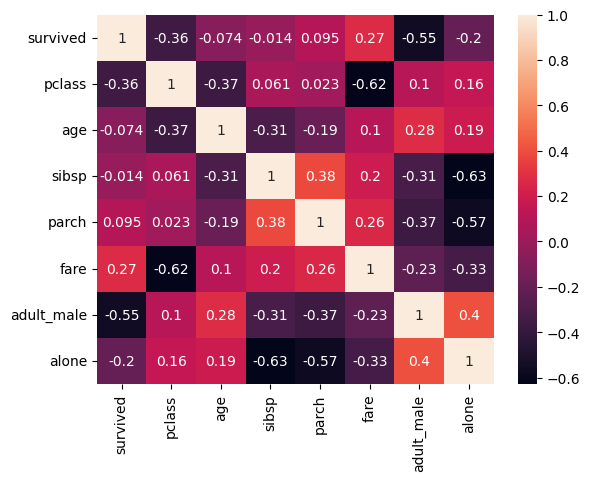

In [ ]:
# Correlation with numbers
sns.heatmap(corr_ks_clean, annot=True)

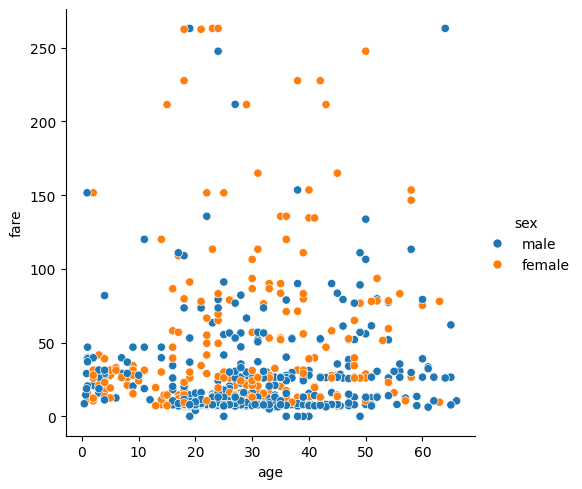

In [49]:
sns.relplot(x="age", y="fare", hue="sex", data=ks_clean_data)

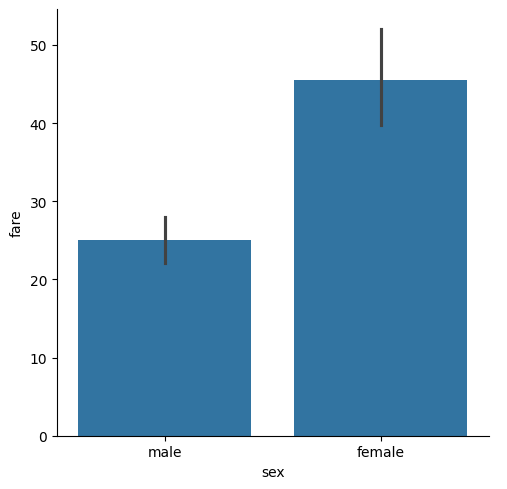

In [50]:
sns.catplot(x="sex", y="fare", data=ks_clean_data, kind="bar")

In [ ]:
# Data Manipulation 
#Log transformation 
ks_clean_data["fare_log"] = np.log(ks_clean_data["fare"])

c:\Users\Yawar Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
ks_clean_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


<Axes: ylabel='fare_log'>

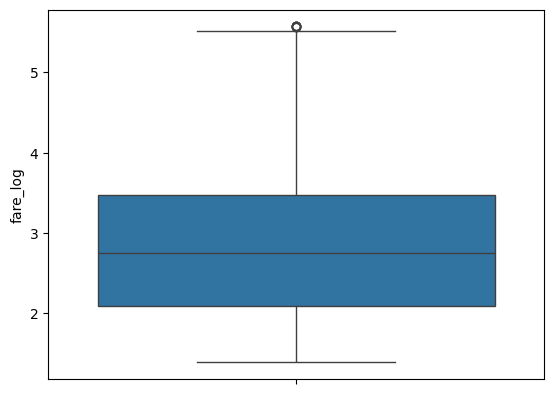

In [57]:
# Boxplot for fare_log
sns.boxplot(y="fare_log", data=ks_clean_data)

In [58]:
# Difference between fare and fare_log
ks_clean_data["fare"].mean()

np.float64(32.569390313390315)

In [59]:
ks_clean_data["fare_log"].mean()

np.float64(-inf)

In [60]:
# Creating a new column for the difference
ks_clean_data["fare_difference"] = ks_clean_data["fare"] - ks_clean_data["fare_log"]

In [61]:
# Display first few rows
ks_clean_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log,fare_difference
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001,5.268999
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662,67.016638
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022,5.854978
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177,49.127823
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672,5.964328
